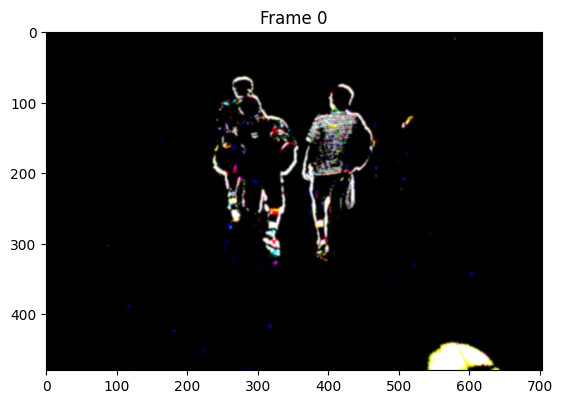

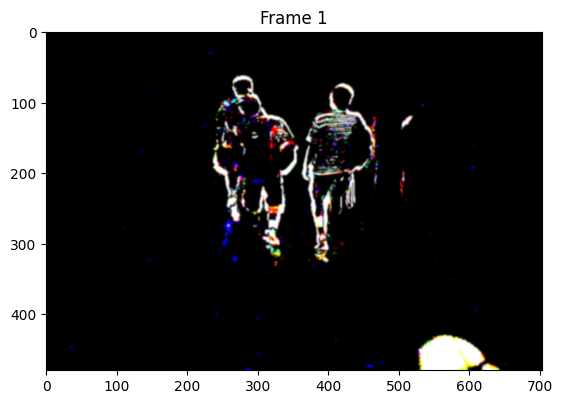

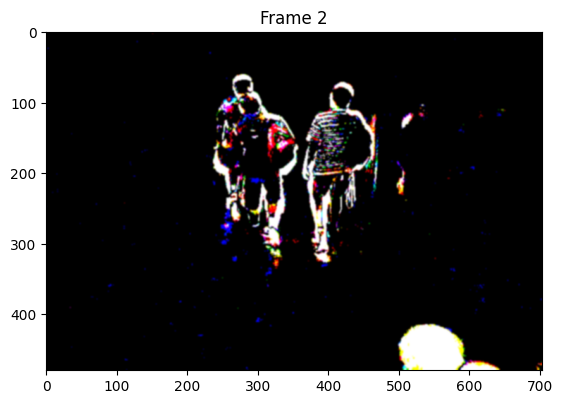

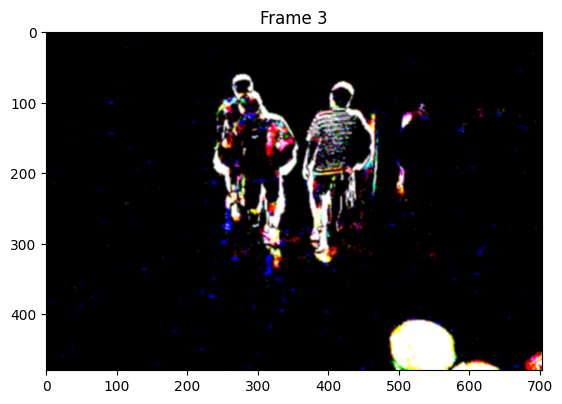

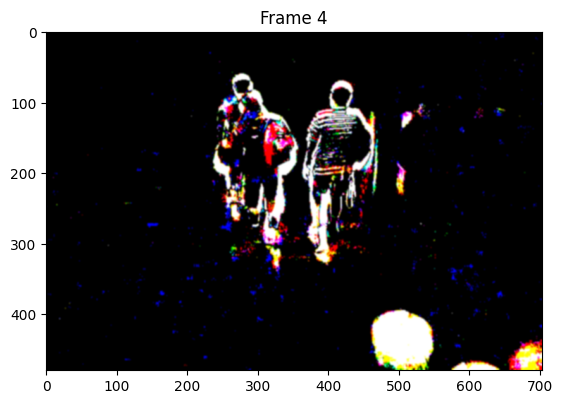

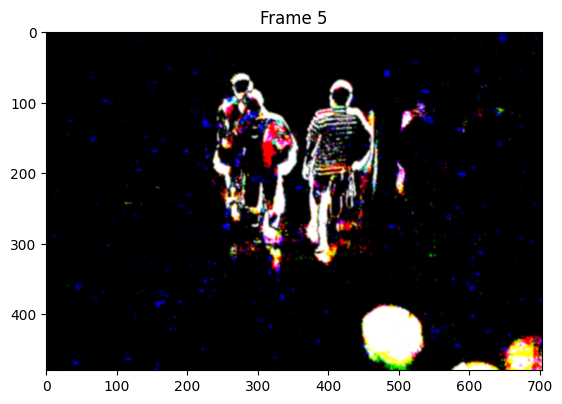

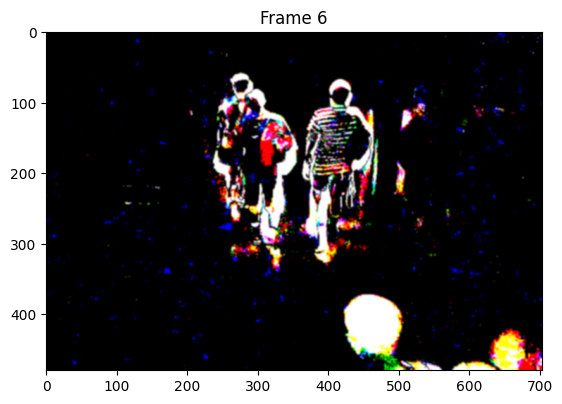

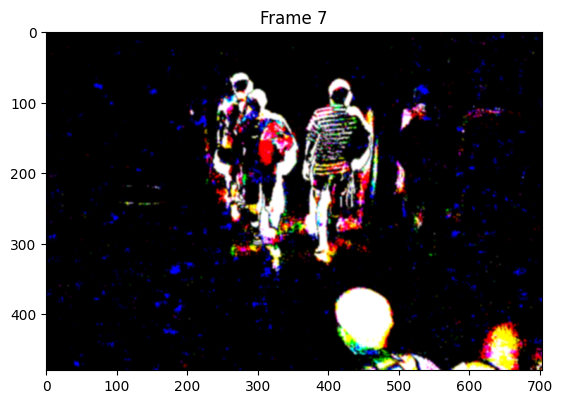

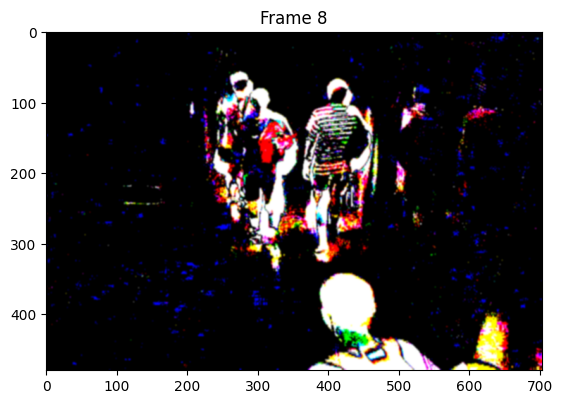

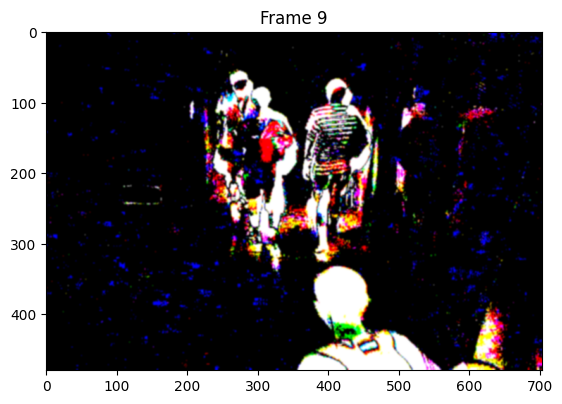

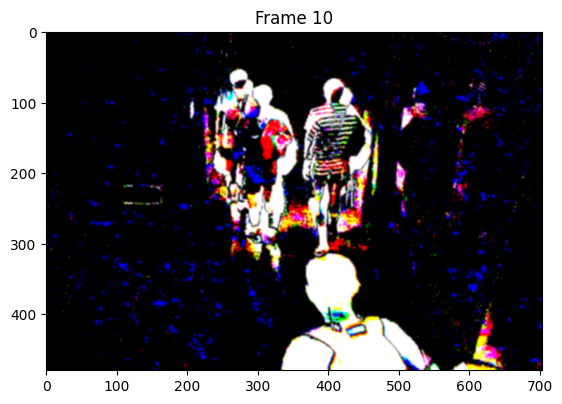

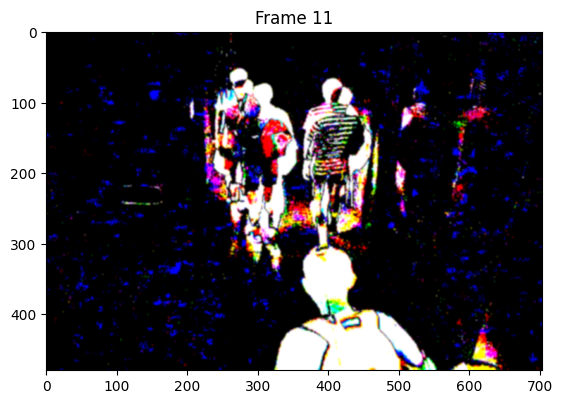

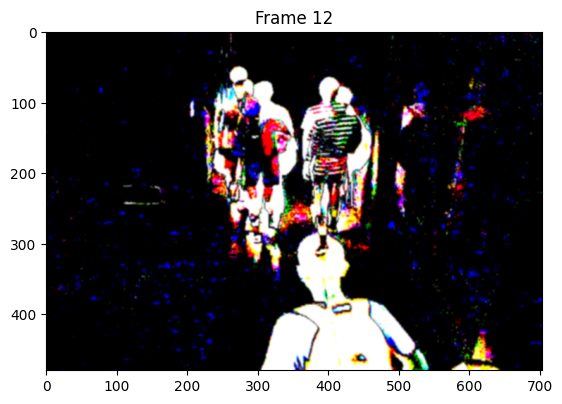

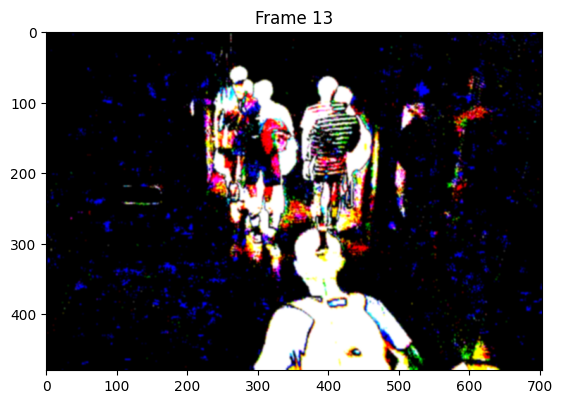

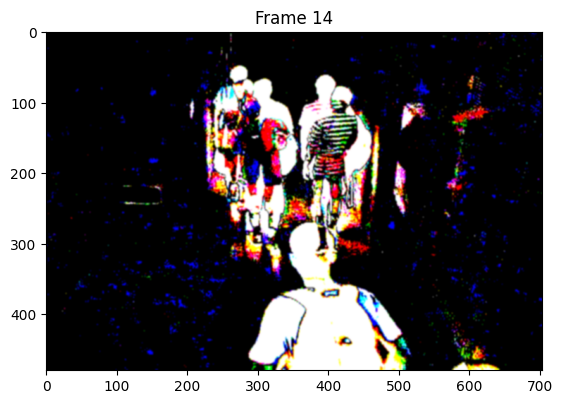

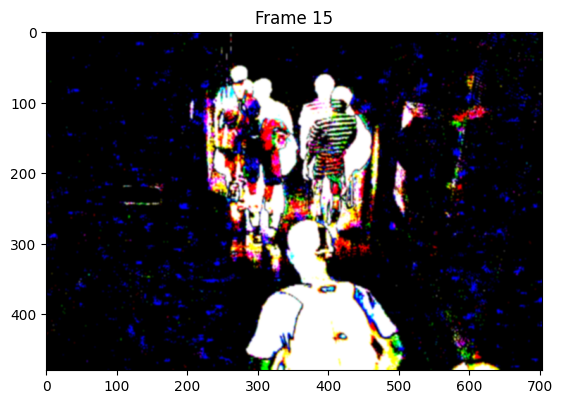

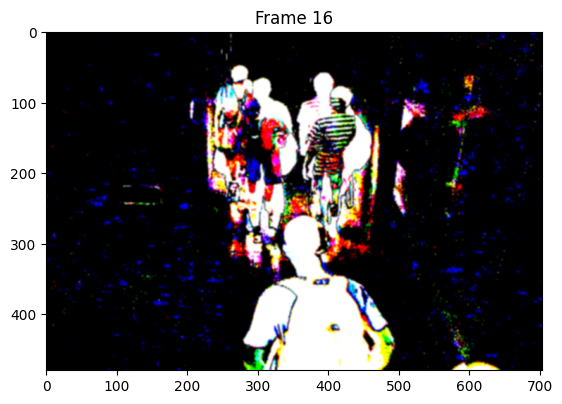

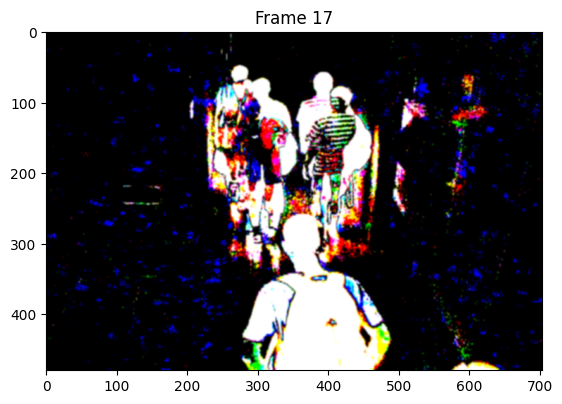

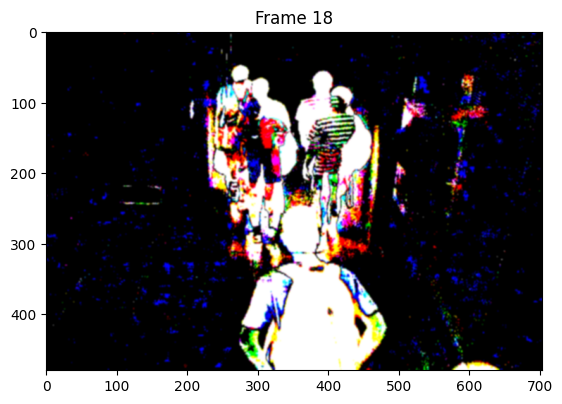

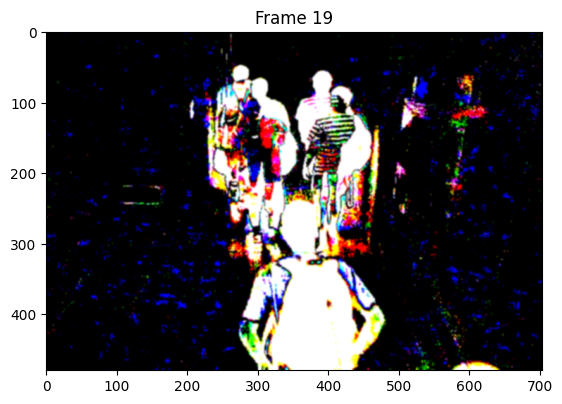

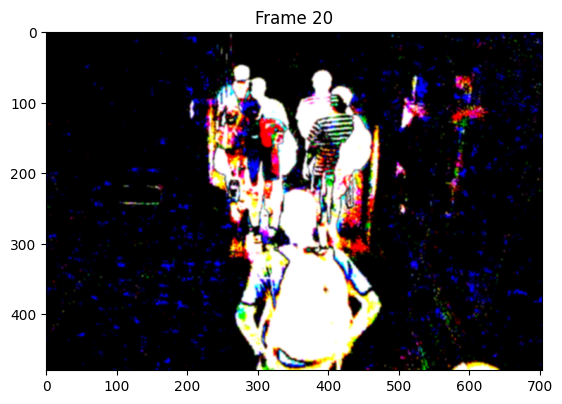

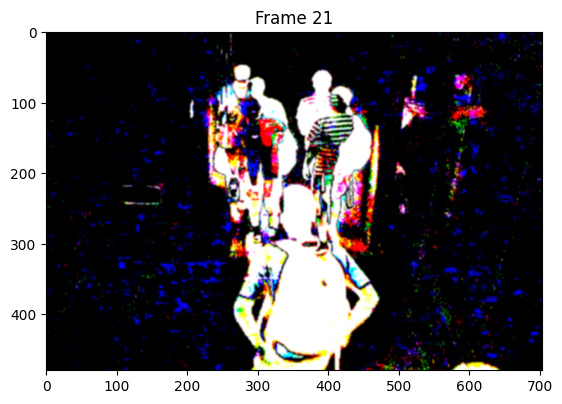

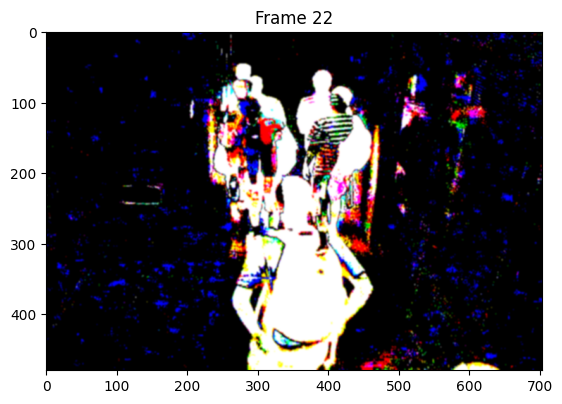

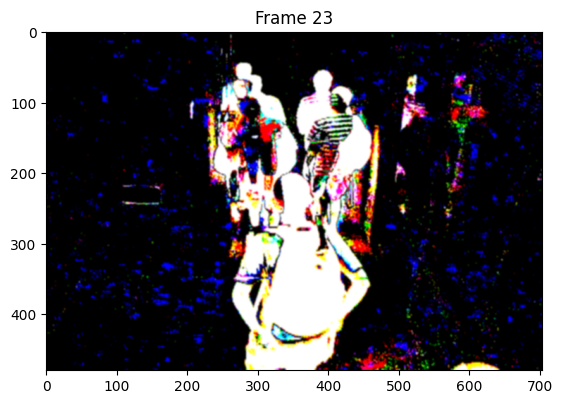

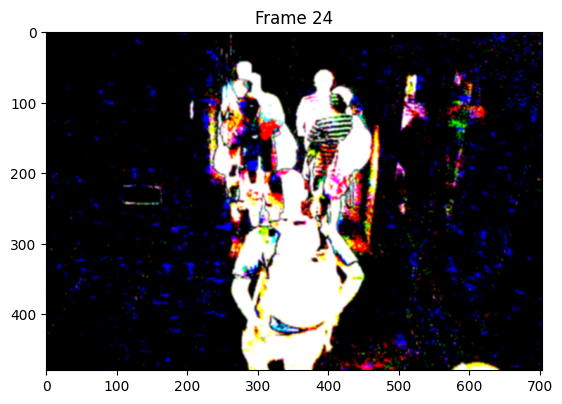

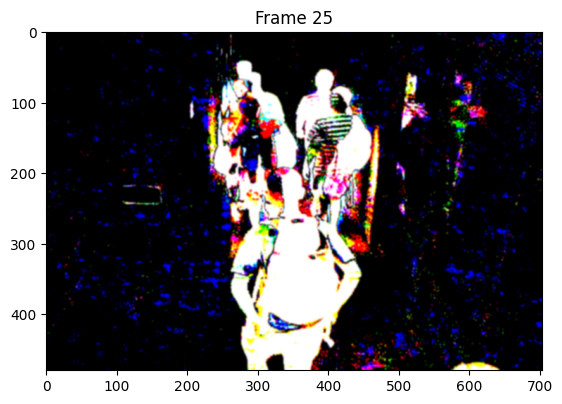

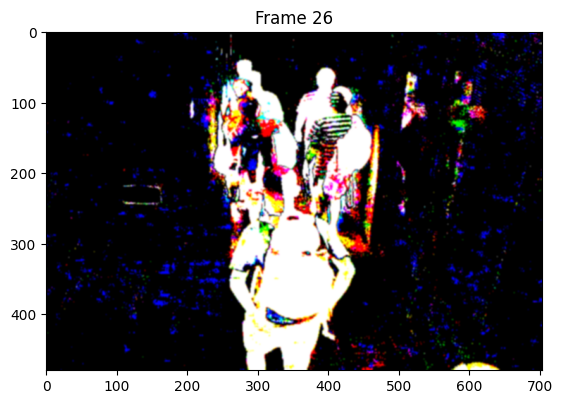

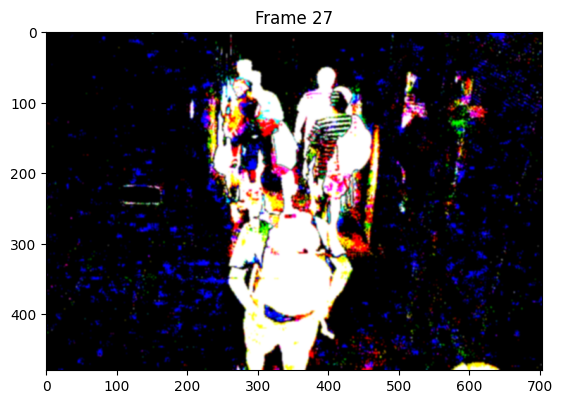

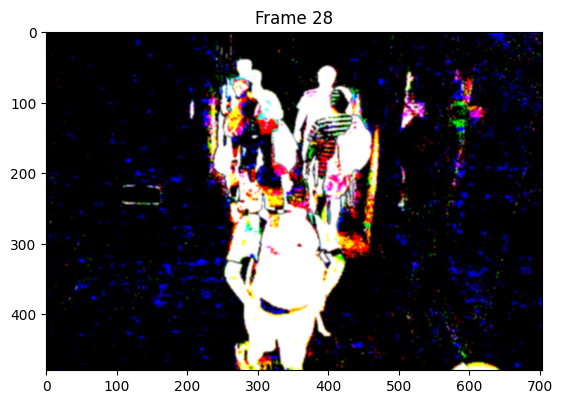

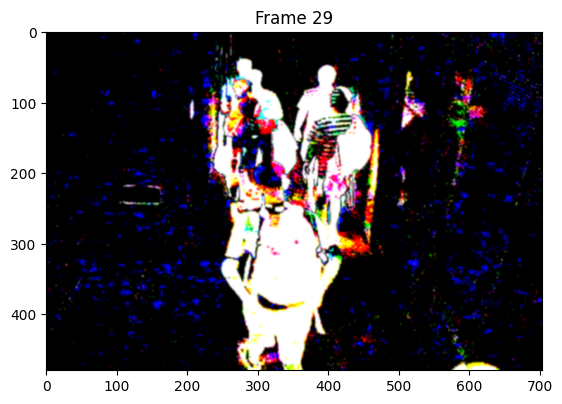

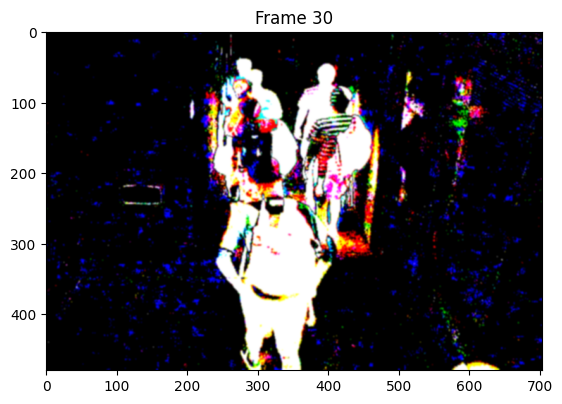

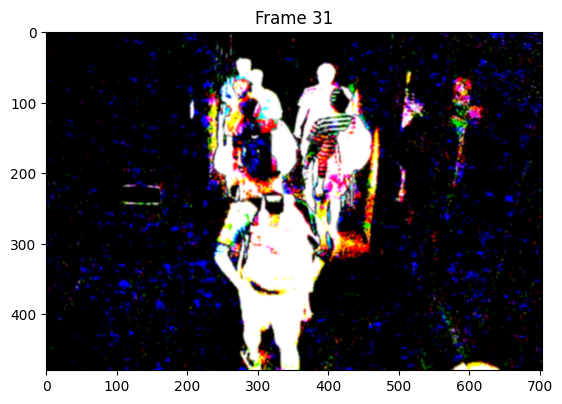

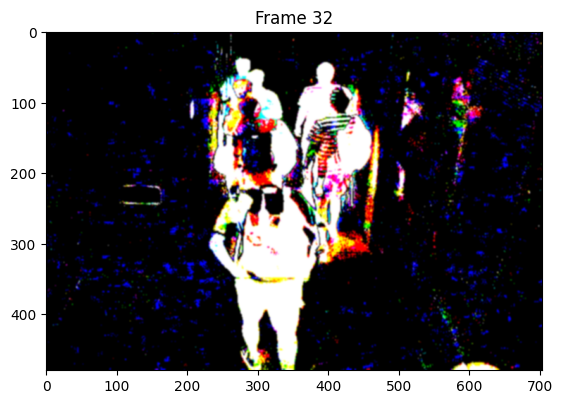

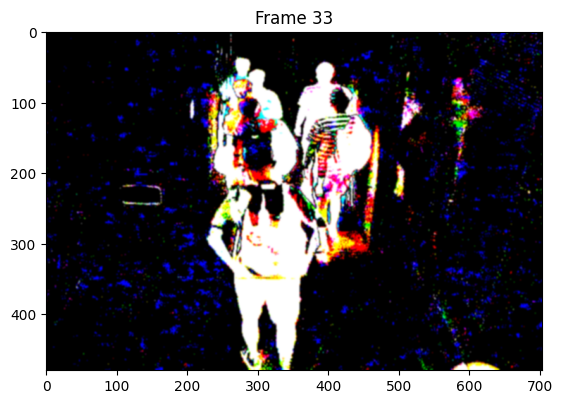

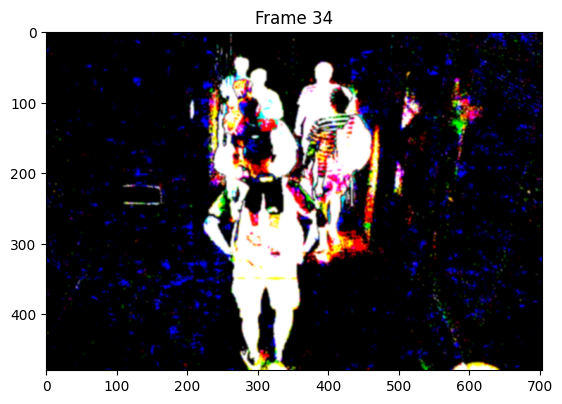

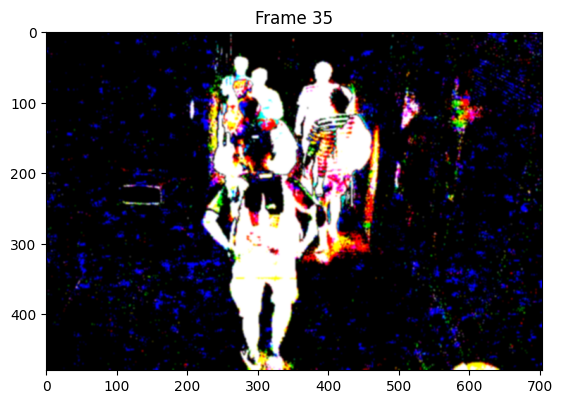

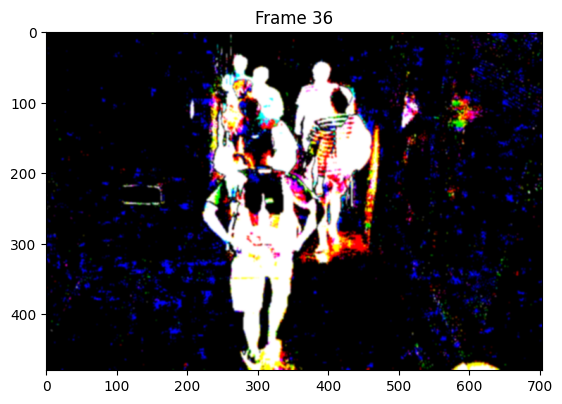

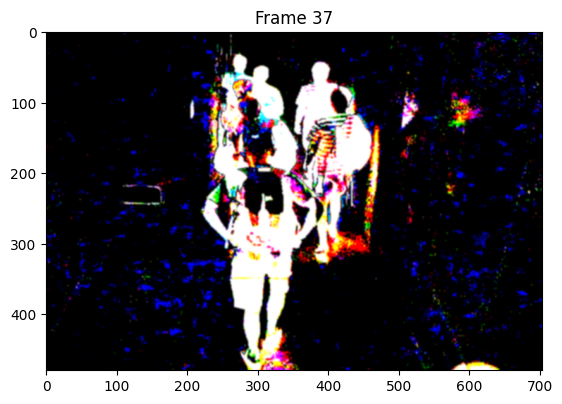

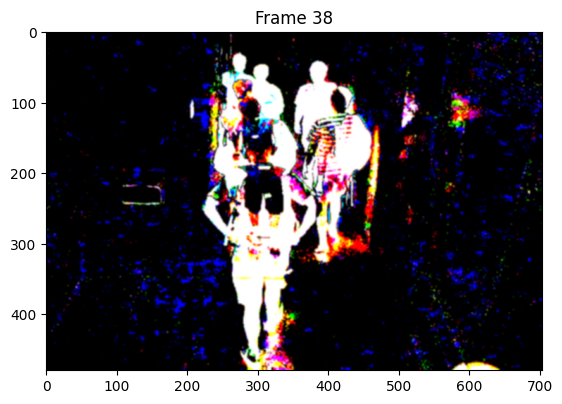

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Abre el video
video_path = 'nofi069.mp4'
cap = cv2.VideoCapture(video_path)

# Crea un directorio para almacenar las imágenes procesadas
output_dir = 'frames_output'
os.makedirs(output_dir, exist_ok=True)

# Guarda la imagen de referencia (primer frame del video)
ret, reference_frame = cap.read()
if ret:
    cv2.imwrite(f"{output_dir}/reference_frame.jpg", reference_frame)

# Función para procesar y comparar cada frame con la imagen de referencia
def process_and_compare_frames(reference, current):
    # Realizar sustracción de imágenes
    difference = cv2.absdiff(reference, current)

    # Aplicar umbralizado (thresholding) para identificar áreas de cambio
    _, thresholded = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)

    # Filtrar ruido con un filtro Gaussiano
    filtered = cv2.GaussianBlur(thresholded, (5, 5), 0)

    return filtered

# Procesa todos los frames y guarda los cambios significativos
frames = 0
while True:
    ret, current_frame = cap.read()
    if not ret:
        break

    # Aplica la función de procesamiento a los frames capturados
    processed_frame = process_and_compare_frames(reference_frame, current_frame)

    # Determina si hay un cambio significativo en la escena
    if np.sum(processed_frame) > 10000:  # Umbral de cambio significativo, ajustar según sea necesario
        img_name = f"{output_dir}/frame_{frames:05d}.jpg"
        cv2.imwrite(img_name, processed_frame)
        
        # Muestra los frames con cambios significativos en una ventana de OpenCV
        cv2.imshow('Processed Frame', processed_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Presiona 'q' para salir
            break

        # Imprime los frames con cambios significativos en la salida
        plt.imshow(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {frames}")
        plt.show()

    frames += 1

# Libera el objeto de captura de video y cierra todas las ventanas de OpenCV
cap.release()
cv2.destroyAllWindows()